## Question

On any given day, a stock has 70% chance of increasing by 1$, and a 30% chance of decreasing by 1$. What are the odds that the stock reaches a \$15 profit before reaching a \$10 loss?

### Solution (Gambler's Ruin Formula)

This is a standard result from a one-dimensional (biased) random walk.

The process is *Markovian*, the probability $u_i$ satisfies the recurrence relation based on the outcomes of the next step.

So for any state $i$ such that $1 \leq i \geq N -1$ we have:

$u_i = pu_{i+1} + qu_{i-1}$

To resolve such a linear homogeneous recurrence, we often search a solution liek $u_i = r^i$

In our case we will have $r^i = qr^{i+1} - pr^{i-1}$

We devide by $r^{i-1}$:

$r = pr^2 + q$

This equation has 2 solutions : $r = 1$ or $r = \frac{q}{p}$

Since the recurrence is linear and second order, the general solution is a linear combination od the two independent solutions:

$u_i = A.1^i + B.(\frac{q}{p})^i$

In borders we have:

$i = 0$:

$u_0 = A + B$ thus $A = -B$

$i = N$ :

$u_N = -B + B(\frac{q}{p})^N = B((\frac{q}{p})^N -1) = 1$

so $B = \frac{1}{(\frac{q}{p})^N - 1}$ and $A = - \frac{1}{(\frac{q}{p})^N - 1}$

Replacing this in the equation we will have:

$u_i = - \frac{1}{(\frac{q}{p})^N - 1} + \frac{1}{(\frac{q}{p})^N -1}(\frac{q}{p})^i$

Finally we will have : *$u_i = \frac{1 - (\frac{q}{p})^i}{1 - (\frac{q}{p})^N}$*


#### Now back to our problem

In our case the lower boundary is (-10) and the upper boundary is (+15) (correspond to +25 in this scale) so the starting point is 10:

$P(hit~ 25~ before~ 0) = \frac{1 - (\frac{q}{p})^{10}}{1 -(\frac{q}{p})^{25}}$

After numerator comptation we find that $P(hit~ 25~ beofre~ 0) \approx 0.9998$


### Simulation

To make sure of our calculations we will simulate this problem:

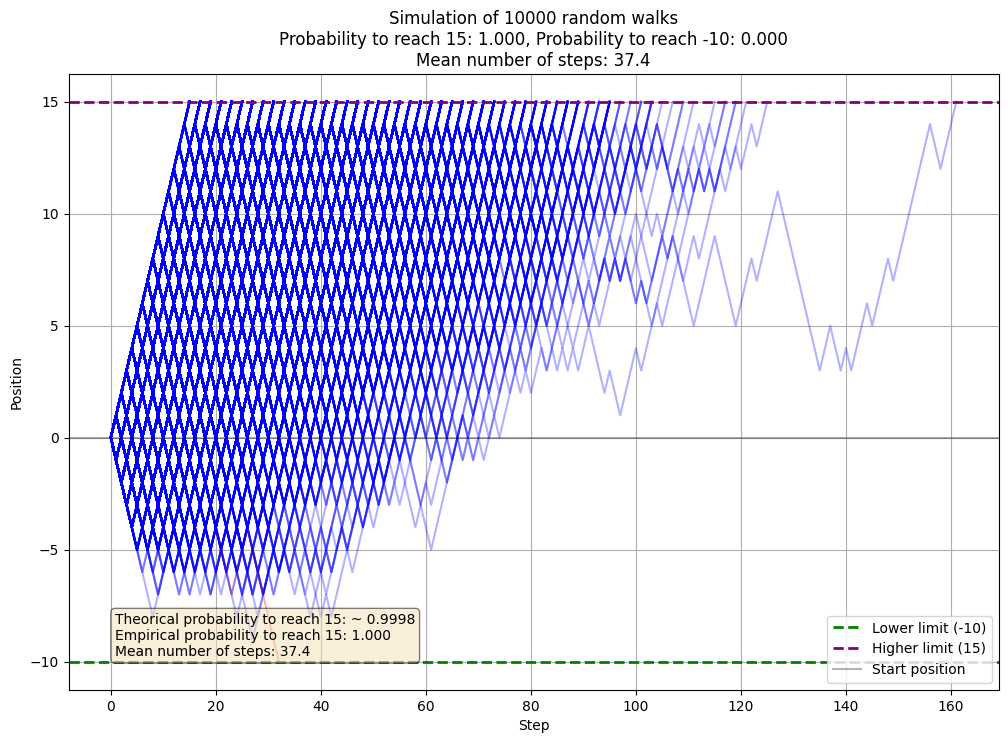

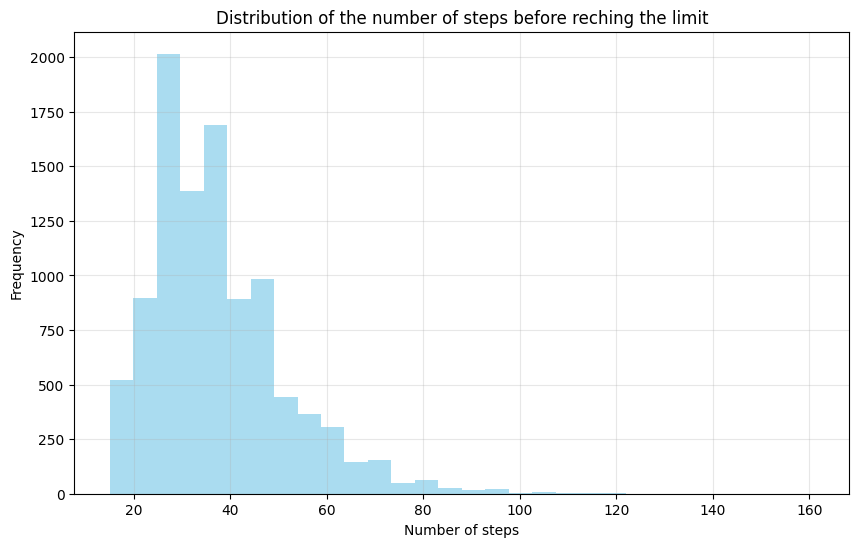

Probability to reach 15: 1.000
Probability to reach -10: 0.000
Mean number of steps: 37.4


In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
start = 0
lower_limit = -10
upper_limit = 15
prob_up = 0.7
prob_down = 0.3
num_simulations = 10000


reached_upper = 0
reached_lower = 0
steps_count = []

plt.figure(figsize=(12, 8))


for sim in range(num_simulations):
    # Simulation
    position = start
    positions = [position]  # Track all positions for plotting
    
    while lower_limit < position < upper_limit:
        move = 1 if np.random.binomial(1, prob_up) == 1 else -1
        position += move
        positions.append(position)
    
    if position >= upper_limit:
        reached_upper += 1
        color = 'blue'  
    else:
        reached_lower += 1
        color = 'red'  
    
    steps_count.append(len(positions)-1)
    
    plt.plot(positions, alpha=0.3, color=color)

plt.axhline(y=lower_limit, color='green', linestyle='--', linewidth=2, label=f'Lower limit ({lower_limit})')
plt.axhline(y=upper_limit, color='purple', linestyle='--', linewidth=2, label=f'Higher limit ({upper_limit})')
plt.axhline(y=start, color='black', linestyle='-', alpha=0.3, label='Start position')


prob_upper = reached_upper / num_simulations
prob_lower = reached_lower / num_simulations
avg_steps = sum(steps_count) / len(steps_count)

plt.title(f'Simulation of {num_simulations} random walks\n'
          f'Probability to reach {upper_limit}: {prob_upper:.3f}, '
          f'Probability to reach {lower_limit}: {prob_lower:.3f}\n'
          f'Mean number of steps: {avg_steps:.1f}')
plt.xlabel('Step')
plt.ylabel('Position')
plt.legend()
plt.grid(True)


textstr = f'Theorical probability to reach {upper_limit}: ~ 0.9998\n' \
          f'Empirical probability to reach {upper_limit}: {prob_upper:.3f}\n' \
          f'Mean number of steps: {avg_steps:.1f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.05, textstr, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='bottom', bbox=props)

plt.show()

# Afficher un histogramme du nombre d'étapes
plt.figure(figsize=(10, 6))
plt.hist(steps_count, bins=30, alpha=0.7, color='skyblue')
plt.title('Distribution of the number of steps before reching the limit')
plt.xlabel('Number of steps')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Probability to reach {upper_limit}: {prob_upper:.3f}")
print(f"Probability to reach {lower_limit}: {prob_lower:.3f}")
print(f"Mean number of steps: {avg_steps:.1f}")